In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

from random import shuffle

In [9]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1

In [10]:
data = []
labels = []
for img in os.listdir(r'ptolemy silver proarchives'):
    label = label_img(img)
    path = os.path.join(r'ptolemy silver proarchives',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [11]:
cols = []
for i in range(4900):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [125]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
532,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2127,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
425,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
245,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
971,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [13]:
test = data.iloc[1800:]
test.reset_index(drop=True,inplace=True)

train = data.iloc[0:1800]
train.reset_index(drop=True,inplace=True)

In [14]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

In [15]:

rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)

RandomForestClassifier()

In [16]:
rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)
rfc

RandomForestClassifier()

In [17]:
y_pred = rfc.predict(test_data)

In [18]:
print (classification_report(test_target,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.96      0.87       286
           1       0.93      0.70      0.80       241

    accuracy                           0.84       527
   macro avg       0.86      0.83      0.83       527
weighted avg       0.86      0.84      0.84       527



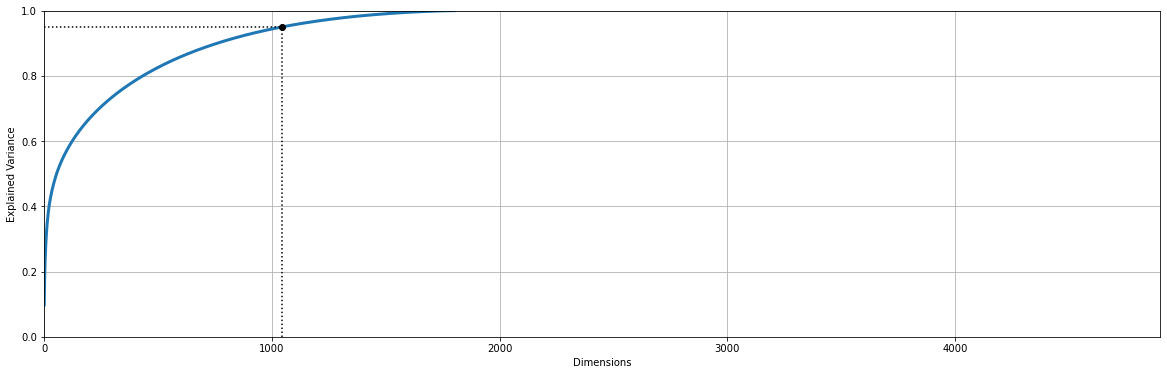

In [94]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(train_data)
cumilative_sum = np.cumsum(pca.explained_variance_ratio_)
pca_plt = plt.figure(figsize=(20,6))
pca_plt = plt.plot(cumilative_sum, linewidth=3)
pca_plt = plt.axis([0, 4900, 0, 1])
pca_plt = plt.xlabel("Dimensions")
pca_plt = plt.ylabel("Explained Variance")
x = np.argmax(cumilative_sum >= 0.95) + 1
pca_plt = plt.plot([x, x], [0, 0.95], "k:")
pca_plt = plt.plot([0, x], [0.95, 0.95], "k:")
pca_plt = plt.plot(x, 0.95, "ko")
plt.grid(True)
plt.show()


In [97]:
pca = PCA(n_components = 0.95)
pca.fit(train_data)
reduced_train = pd.DataFrame(pca.transform(train_data))
print("The total amount of dimensions: ",reduced_train.shape[1])

The total amount of dimensions:  1045


In [100]:
pca_test = PCA(n_components = 527)
pca_test.fit(test_data)
reduced_test = pd.DataFrame(pca.transform(test_data))

In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_data, train_target)
xgb_pred = xgb.predict(test_data)
print('XGBoost accuracy score: %.2f'%(xgb.score(test_data, test_target)*100),'%')

C:\Users\yahal\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 85.39 %


In [103]:
reduced_train.shape

(1800, 1045)

In [109]:
xgb.fit(reduced_train, train_target)
xgb_pred = xgb.predict(reduced_test)
print('XGBoost accuracy score: %.2f'%(xgb.score(reduced_test, test_target)*100),'%')

C:\Users\yahal\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 84.63 %


In [99]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

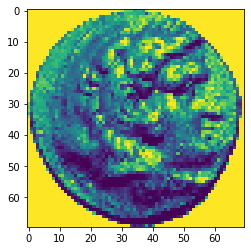

In [100]:
plt.imshow(train_data.iloc[0].values.reshape((70,70)))

In [101]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    test_data_reshaped.append(t)

In [102]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)

In [103]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [104]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 42)        12138     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 42)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 52)        19708     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 7, 7, 52)        

In [105]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

Epoch 1/18
18/18 [==============================] - 12s 556ms/step - loss: 0.6787 - accuracy: 0.5700
Epoch 2/18
18/18 [==============================] - 10s 576ms/step - loss: 0.6616 - accuracy: 0.5833
Epoch 3/18
18/18 [==============================] - 10s 547ms/step - loss: 0.5226 - accuracy: 0.7683
Epoch 4/18
18/18 [==============================] - 11s 596ms/step - loss: 0.3337 - accuracy: 0.8839
Epoch 5/18
18/18 [==============================] - 11s 589ms/step - loss: 0.2930 - accuracy: 0.8994
Epoch 6/18
18/18 [==============================] - 10s 580ms/step - loss: 0.2825 - accuracy: 0.9078
Epoch 7/18
18/18 [==============================] - 10s 569ms/step - loss: 0.2738 - accuracy: 0.9050
Epoch 8/18
18/18 [==============================] - 10s 539ms/step - loss: 0.2690 - accuracy: 0.9083
Epoch 9/18
18/18 [==============================] - 9s 496ms/step - loss: 0.2608 - accuracy: 0.9094
Epoch 10/18
18/18 [==============================] - 9s 503ms/step - loss: 0.2464 - accuracy

In [106]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

17/17 - 1s - loss: 0.2925 - accuracy: 0.9051 - 1s/epoch - 83ms/step


In [112]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

17/17 [==============================] - 1s 50ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       286
           1       0.95      0.84      0.89       241

    accuracy                           0.91       527
   macro avg       0.91      0.90      0.90       527
weighted avg       0.91      0.91      0.90       527



Text(33.0, 0.5, 'Actual')

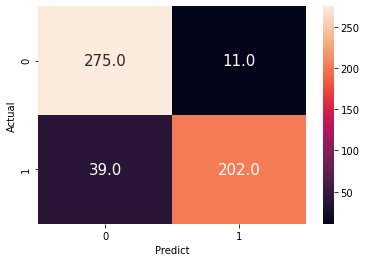

In [114]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [120]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(60, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(30, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 68, 68, 100)       1000      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 34, 34, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 80)        72080     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 80)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 60)        43260     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 7, 7, 60)       

In [121]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

Epoch 1/18
18/18 [==============================] - 29s 2s/step - loss: 0.6812 - accuracy: 0.5833
Epoch 2/18
18/18 [==============================] - 27s 1s/step - loss: 0.6750 - accuracy: 0.5833
Epoch 3/18
18/18 [==============================] - 26s 1s/step - loss: 0.5937 - accuracy: 0.6606
Epoch 4/18
18/18 [==============================] - 27s 1s/step - loss: 0.3979 - accuracy: 0.8456
Epoch 5/18
18/18 [==============================] - 30s 2s/step - loss: 0.3449 - accuracy: 0.8794
Epoch 6/18
18/18 [==============================] - 30s 2s/step - loss: 0.3128 - accuracy: 0.8878
Epoch 7/18
18/18 [==============================] - 28s 2s/step - loss: 0.2969 - accuracy: 0.9000
Epoch 8/18
18/18 [==============================] - 27s 1s/step - loss: 0.2726 - accuracy: 0.9067
Epoch 9/18
18/18 [==============================] - 27s 1s/step - loss: 0.2695 - accuracy: 0.9078
Epoch 10/18
18/18 [==============================] - 26s 1s/step - loss: 0.2575 - accuracy: 0.9144
Epoch 11/18
18/18 [

In [122]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

17/17 - 2s - loss: 0.2826 - accuracy: 0.8975 - 2s/epoch - 136ms/step


In [123]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

17/17 [==============================] - 2s 119ms/step
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       286
           1       0.94      0.83      0.88       241

    accuracy                           0.90       527
   macro avg       0.91      0.89      0.90       527
weighted avg       0.90      0.90      0.90       527



Text(33.0, 0.5, 'Actual')

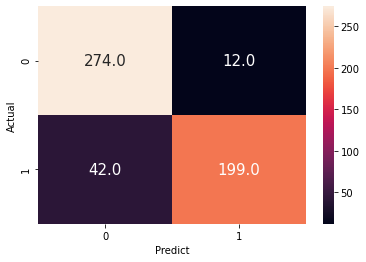

In [124]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

# COLOR

In [126]:
data = []
labels = []
for img in os.listdir(r'ptolemy silver proarchives'):
    label = label_img(img)
    path = os.path.join(r'ptolemy silver proarchives',img)
    img = cv2.resize(cv2.imread(path),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [128]:
cols = []
for i in range(14700):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [129]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_14691,pixel_14692,pixel_14693,pixel_14694,pixel_14695,pixel_14696,pixel_14697,pixel_14698,pixel_14699,label
532,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2127,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
425,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
245,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
971,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [130]:
test = data.iloc[1800:]
test.reset_index(drop=True,inplace=True)

train = data.iloc[0:1800]
train.reset_index(drop=True,inplace=True)

In [131]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

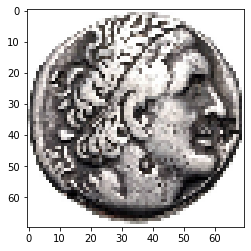

In [132]:
plt.imshow(np.flip(np.array(train_data.loc[1]).reshape(70,70,3),2))

In [133]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70,3))
    t = np.flip(np.array(t),2)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70,3))
    t = np.flip(np.array(t),2)
    test_data_reshaped.append(t)

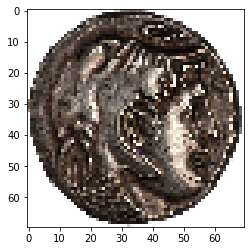

In [135]:
plt.imshow(test_data_reshaped[1])

In [136]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [148]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(rate = 0.2))

model.add(layers.Dense(2))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 32, 32, 42)        12138     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 16, 16, 42)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 52)        19708     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 7, 7, 52)       

In [149]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

Epoch 1/18
18/18 [==============================] - 13s 600ms/step - loss: 0.6772 - accuracy: 0.5856
Epoch 2/18
18/18 [==============================] - 13s 695ms/step - loss: 0.6359 - accuracy: 0.6333
Epoch 3/18
18/18 [==============================] - 11s 636ms/step - loss: 0.5108 - accuracy: 0.7956
Epoch 4/18
18/18 [==============================] - 12s 673ms/step - loss: 0.4406 - accuracy: 0.8350
Epoch 5/18
18/18 [==============================] - 12s 674ms/step - loss: 0.3537 - accuracy: 0.8744
Epoch 6/18
18/18 [==============================] - 13s 708ms/step - loss: 0.3357 - accuracy: 0.8800
Epoch 7/18
18/18 [==============================] - 12s 653ms/step - loss: 0.3071 - accuracy: 0.8994
Epoch 8/18
18/18 [==============================] - 11s 640ms/step - loss: 0.2811 - accuracy: 0.9072
Epoch 9/18
18/18 [==============================] - 11s 617ms/step - loss: 0.2792 - accuracy: 0.9011
Epoch 10/18
18/18 [==============================] - 12s 632ms/step - loss: 0.2490 - accura

In [150]:
test_loss, test_acc = model.evaluate(test_data_reshaped, test_target, verbose=2)

17/17 - 1s - loss: 0.3048 - accuracy: 0.9108 - 1s/epoch - 76ms/step


In [151]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

17/17 [==============================] - 1s 76ms/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       286
           1       0.96      0.84      0.90       241

    accuracy                           0.91       527
   macro avg       0.92      0.91      0.91       527
weighted avg       0.92      0.91      0.91       527



Text(33.0, 0.5, 'Actual')

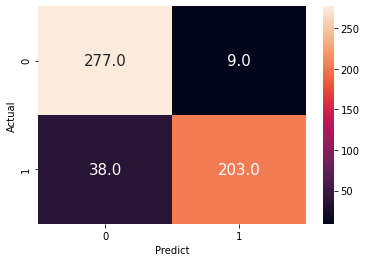

In [152]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")